In [1]:
import os
import yaml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
%matplotlib inline

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
runs = 100

In [17]:
X_train_locs = []
y_train_locs = []

titles = []

for alg in ['Louvain', 'Infomap', 'LPA']:
    X_train_locs.append('../LFR_Graph_Data/1000_Node_Params/{0}_Data/node_x_train_mu_3.csv'.format(alg))
    y_train_locs.append('../LFR_Graph_Data/1000_Node_Params/{0}_Data/node_y_train_mu_3.csv'.format(alg))
    titles.append('{0} at mu 0.3 with LFR paper params'.format(alg))
    
    X_train_locs.append('6-email-eu-core/{0}/lfr_gen_node_x_train.csv'.format(alg))
    y_train_locs.append('6-email-eu-core/{0}/lfr_gen_node_y_train.csv'.format(alg))
    titles.append('{0} at mu 0.3 with params matching email-eu-core'.format(alg))
    
    X_train_locs.append('6-email-eu-core/{0}/node_x_train.csv'.format(alg))
    y_train_locs.append('6-email-eu-core/{0}/node_y_train.csv'.format(alg))
    titles.append('{0} at mu 0.3 on email-eu-core graph'.format(alg))
        

cols = ['pink' for _ in range(3)] + ['purple' for _ in range(3)] + ['green' for _ in range(3)]

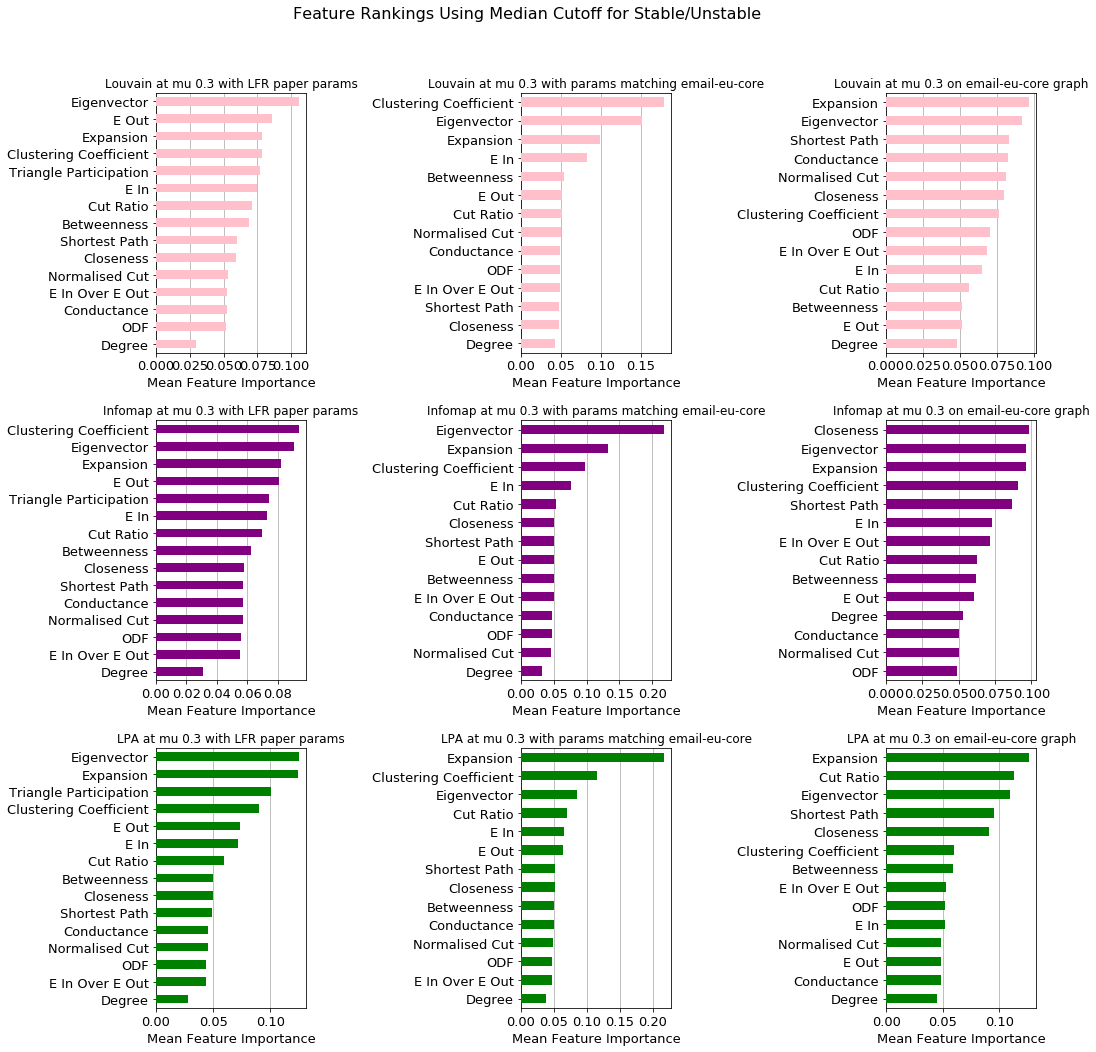

In [18]:
fig = plt.figure(figsize=(75,75))
for exp in range(9):
    
    X_train = pd.read_csv(X_train_locs[exp], index_col=0)
    if 'Triangle Participation' in X_train.columns:
        X_train.drop(columns=['Triangle Participation'])
    y_train = pd.read_csv(y_train_locs[exp], index_col=0)
    
    feature_list = list(X_train.columns)
    data = np.array(X_train)
    labels = np.squeeze(np.array(y_train))

    accuracy_scores = []
    feature_importances = {}
    for f in feature_list:
        feature_importances[f] = []
    rows = []

    skf = StratifiedKFold(n_splits=5)
    rf = RandomForestClassifier()

    fold_count = 0

    for run in range(1, runs+1):

        for i in range(5):

            fold_count += 1

            folds = next(skf.split(data, labels), None)

            X_train_fold = data[folds[0], :]
            X_val_fold = data[folds[1], :]
            y_train_fold = labels[folds[0]]
            y_val_fold = labels[folds[1]]

            model = rf.fit(X_train_fold, y_train_fold)
            predictions = rf.predict(X_val_fold)

            accuracy_scores.append(metrics.accuracy_score(y_val_fold, predictions))

            row = {"run": fold_count}
            for j, feature in enumerate(feature_list):
                row[feature] = rf.feature_importances_[j]
            rows.append(row)
    df_importances = pd.DataFrame(rows).set_index("run")
    feature_ranking = df_importances.mean().sort_values(ascending=False)
    ax = fig.add_subplot(3,3,exp+1)
    alg_col = cols[exp]
    feature_ranking[::-1].plot.barh(fontsize=13, figsize=(15,15), color=alg_col, zorder=3)
    ax.set_xlabel("Mean Feature Importance", fontsize=13)
    ax.set_title(titles[exp])
    ax.xaxis.grid()
fig.suptitle('Feature Rankings Using Median Cutoff for Stable/Unstable', fontsize=16)
fig.tight_layout(pad=2)
fig.subplots_adjust(top=0.9)

In [19]:
X_train_locs = []
y_train_locs = []

titles = []

for alg in ['Louvain', 'Infomap', 'LPA']:
    X_train_locs.append('../LFR_Graph_Data/1000_Node_Params/{0}_Data/node_x_train_kmeans_mu_3.csv'.format(alg))
    y_train_locs.append('../LFR_Graph_Data/1000_Node_Params/{0}_Data/node_y_train_kmeans_mu_3.csv'.format(alg))
    titles.append('{0} at mu 0.3 with LFR paper params'.format(alg))
    
    X_train_locs.append('6-email-eu-core/{0}/lfr_gen_node_x_train_kmeans.csv'.format(alg))
    y_train_locs.append('6-email-eu-core/{0}/lfr_gen_node_y_train_kmeans.csv'.format(alg))
    titles.append('{0} at mu 0.3 with params matching email-eu-core'.format(alg))
    
    X_train_locs.append('6-email-eu-core/{0}/node_x_train_kmeans.csv'.format(alg))
    y_train_locs.append('6-email-eu-core/{0}/node_y_train_kmeans.csv'.format(alg))
    titles.append('{0} at mu 0.3 on email-eu-core graph'.format(alg))
        

cols = ['pink' for _ in range(3)] + ['purple' for _ in range(3)] + ['green' for _ in range(3)]

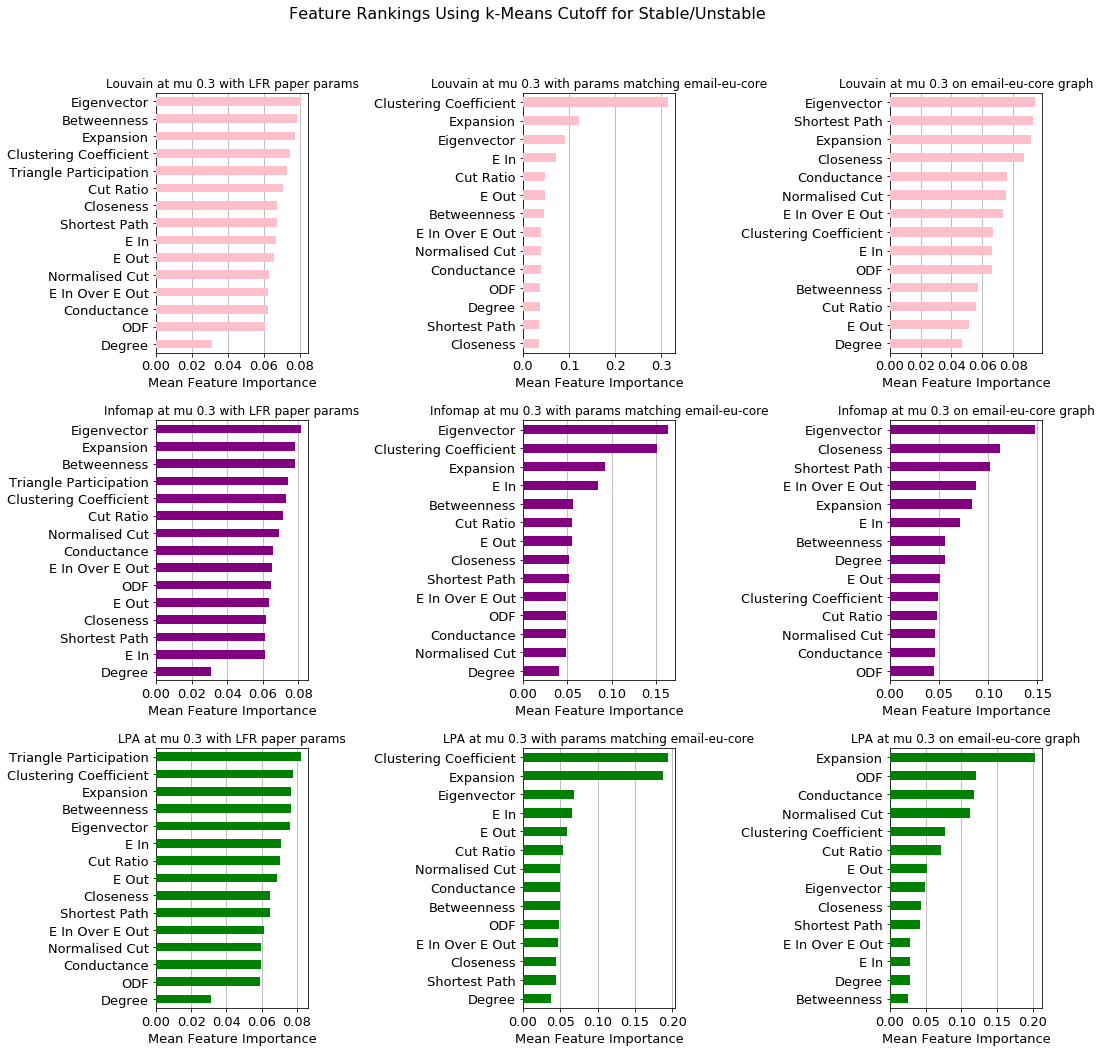

In [21]:
fig = plt.figure(figsize=(75,75))
for exp in range(9):
    
    X_train = pd.read_csv(X_train_locs[exp], index_col=0)
    if 'Triangle Participation' in X_train.columns:
        X_train.drop(columns=['Triangle Participation'])
    y_train = pd.read_csv(y_train_locs[exp], index_col=0)
    
    feature_list = list(X_train.columns)
    data = np.array(X_train)
    labels = np.squeeze(np.array(y_train))

    accuracy_scores = []
    feature_importances = {}
    for f in feature_list:
        feature_importances[f] = []
    rows = []

    skf = StratifiedKFold(n_splits=5)
    rf = RandomForestClassifier()

    fold_count = 0

    for run in range(1, runs+1):

        for i in range(5):

            fold_count += 1

            folds = next(skf.split(data, labels), None)

            X_train_fold = data[folds[0], :]
            X_val_fold = data[folds[1], :]
            y_train_fold = labels[folds[0]]
            y_val_fold = labels[folds[1]]

            model = rf.fit(X_train_fold, y_train_fold)
            predictions = rf.predict(X_val_fold)

            accuracy_scores.append(metrics.accuracy_score(y_val_fold, predictions))

            row = {"run": fold_count}
            for j, feature in enumerate(feature_list):
                row[feature] = rf.feature_importances_[j]
            rows.append(row)
    df_importances = pd.DataFrame(rows).set_index("run")
    feature_ranking = df_importances.mean().sort_values(ascending=False)
    ax = fig.add_subplot(3,3,exp+1)
    alg_col = cols[exp]
    feature_ranking[::-1].plot.barh(fontsize=13, figsize=(15,15), color=alg_col, zorder=3)
    ax.set_xlabel("Mean Feature Importance", fontsize=13)
    ax.set_title(titles[exp])
    ax.xaxis.grid()
fig.suptitle('Feature Rankings Using k-Means Cutoff for Stable/Unstable', fontsize=16)
fig.tight_layout(pad=2)
fig.subplots_adjust(top=0.9)